In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering

import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("./insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [10]:
data.drop_duplicates(inplace=True)

# Visualizing the data 

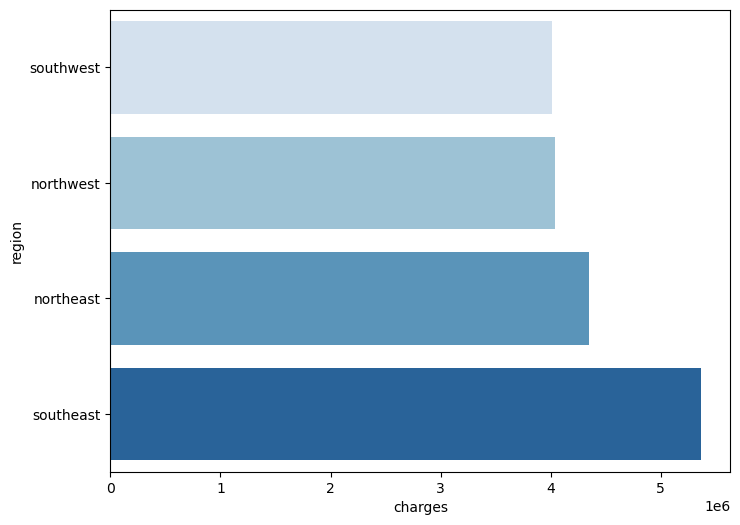

In [11]:
charges = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues')

In this graph, we see the charges paid by region. In Southeast, it is higher than the others.

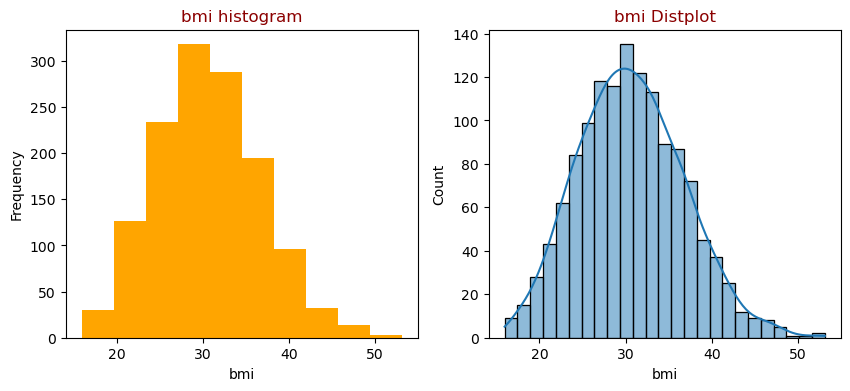

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(data["bmi"], color="orange")
plt.xlabel("bmi")
plt.ylabel("Frequency")

plt.title("bmi histogram", color = "darkred")
plt.subplot(1,2,2)
sns.histplot(data["bmi"],kde=True)
plt.title("bmi Distplot", color = "darkred")

plt.show()

We can see from both graphs that the bmi has a nice distribution, almost the same as the normal distribution. 

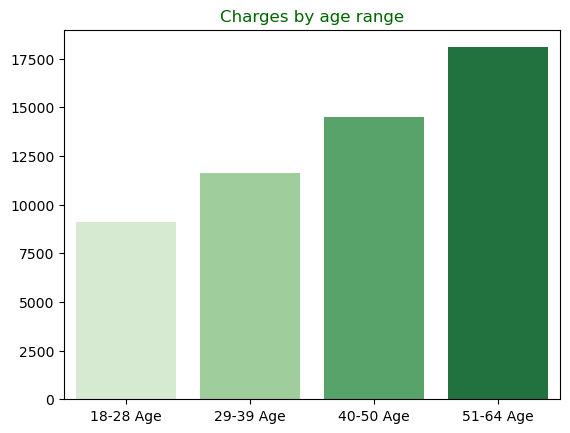

In [13]:
ageFirstInterval = data[data["age"].between(18,28, inclusive = 'both')]["charges"].mean()
ageSecondInterval = data[data["age"].between(29,39, inclusive = 'both')]["charges"].mean()
ageThirdInterval = data[data["age"].between(40,50, inclusive = 'both')]["charges"].mean()
ageFourthInterval = data[data["age"].between(51,64, inclusive = 'both')]["charges"].mean()

ageRanges = ["18-28 Age","29-39 Age","40-50 Age","51-64 Age"]
averageAge = [ageFirstInterval,ageSecondInterval,ageThirdInterval,ageFourthInterval]
sns.barplot(x=ageRanges, y=averageAge, palette="Greens")
plt.title("Charges by age range", color = "darkgreen")
plt.show()

We see the charges in by age range. We notice that the charges paid increase as the age gets older.

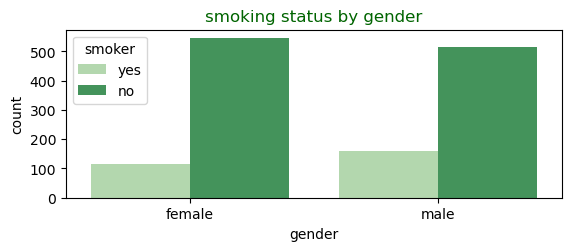

In [14]:
plt.subplot(2,2,(3,4))
sns.countplot(x = 'sex', hue = 'smoker', data = data, palette="Greens")
plt.title("smoking status by gender", color = "darkgreen")
plt.xlabel("gender")
plt.show()

Here, we can see how the smoking status and the gender affect charges.

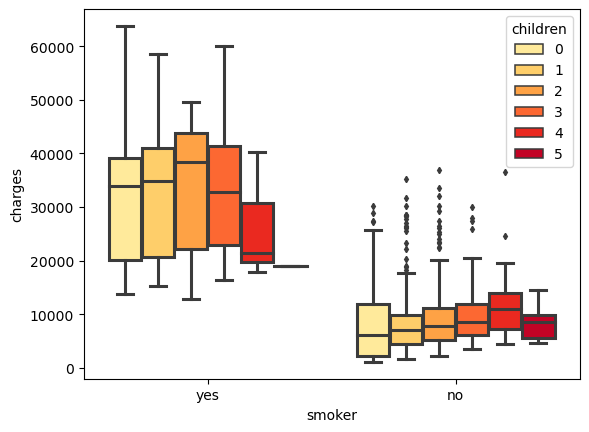

In [15]:
sns.boxplot(x="smoker", y="charges", hue="children", linewidth=2.2, fliersize= 3.2 ,data=data, saturation=1, palette="YlOrRd")

plt.show()

The above graphs show us that smokers generally face higher insurance charges than non-smokers.

In [16]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [17]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
label=preprocessing.LabelEncoder()
data['sex']=label.fit_transform(data['sex'].astype(str))
data['smoker']=label.fit_transform(data['smoker'].astype(str))
df=pd.get_dummies(data)
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


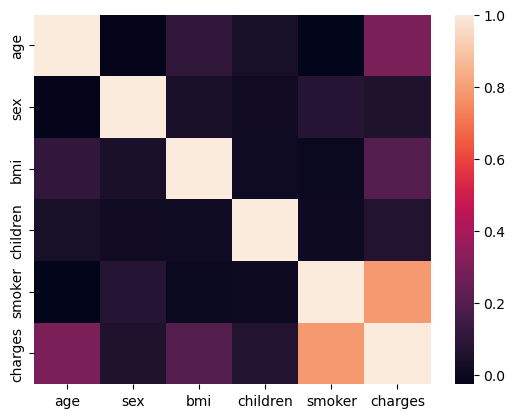

In [20]:
sns.heatmap(data.corr())
plt.show()

# Regression

In [21]:
X = df.drop('charges', axis=1)
Y = df['charges']

scaler=StandardScaler()
X=scaler.fit_transform(X)  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
def evaluate_models(models, x_train, y_train, x_test, y_test):
    
    results = {}
    
    for name, model in models.items():
        
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        training_score = model.score(x_train, y_train)     
        r2 = r2_score(y_test, y_pred)

        
        results[name] = {
            'training_score': training_score,
            'r2_score': r2
        }
        
        
    return results


In [23]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet':ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNeighbors' : KNeighborsRegressor(),
    'Lars' : Lars(normalize=False)
}


results = evaluate_models(models, x_train, y_train, x_test, y_test)


for name, result in results.items():
    print(name)
    print('training_score:', result['training_score'])
    print('r2_score:', result['r2_score'])
    print('------------------------------------')


LinearRegression
training_score: 0.7332591951266911
r2_score: 0.7955890225945396
------------------------------------
Lasso
training_score: 0.733292030438685
r2_score: 0.7958384996424144
------------------------------------
Ridge
training_score: 0.7332914050698078
r2_score: 0.7957090402587722
------------------------------------
ElasticNet
training_score: 0.6480221668724906
r2_score: 0.6639258697385602
------------------------------------
Decision Tree
training_score: 0.9987502672351951
r2_score: 0.8105988156289419
------------------------------------
KNeighbors
training_score: 0.8594350314562879
r2_score: 0.8359050954509522
------------------------------------
Lars
training_score: 0.7332921009476279
r2_score: 0.795875543276074
------------------------------------


In [24]:
def tune_models(models, params, x_train, y_train):
 
    best_params = {}
    
    for name, model in models.items():
        
        param_grid = params[name]
        
        grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
        grid_search.fit(x_train, y_train)
        
        best_params[name] = grid_search.best_params_
        
    return best_params


In [25]:
models_hyper = {
    'Decision Tree': DecisionTreeRegressor(),
    'KNeighbors' : KNeighborsRegressor()
}

params = {
    'Decision Tree': {'max_depth':[1, 2, 3, 4, 5, 7, 8]},
    'KNeighbors' : {'n_neighbors': [10, 12, 14, 18, 20, 25, 30, 35, 50]}

}

best_params = tune_models(models_hyper, params, x_train, y_train)

for name, params in best_params.items():
    print(name)
    print(params)
    print('------------------------------------')

Decision Tree
{'max_depth': 4}
------------------------------------
KNeighbors
{'n_neighbors': 10}
------------------------------------


In [26]:
models_hyper = {
    'Decision Tree': DecisionTreeRegressor(max_depth=4),
    'KNeighbors' : KNeighborsRegressor(n_neighbors=10)
}


results = evaluate_models(models_hyper, x_train, y_train, x_test, y_test)


for name, result in results.items():
    print(name)
    print('training_score:', result['training_score'])
    print('r2_score:', result['r2_score'])
    print('------------------------------------')


Decision Tree
training_score: 0.8649170419322271
r2_score: 0.8712249922110284
------------------------------------
KNeighbors
training_score: 0.8190163990519164
r2_score: 0.8216775637827244
------------------------------------


# Clustering bmi-charges

In [27]:
cluster1 = df[["bmi", "charges"]]
cluster1

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


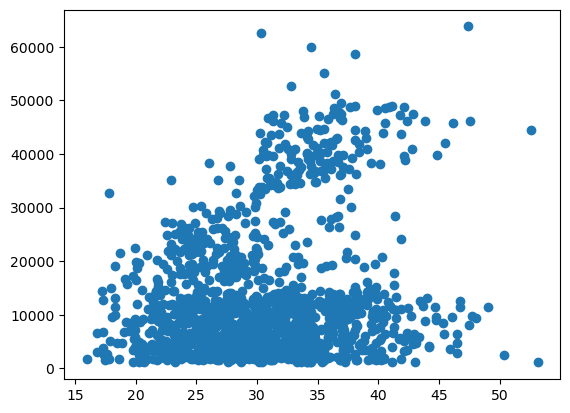

In [28]:
plt.scatter(cluster1.bmi,cluster1.charges)
plt.show()

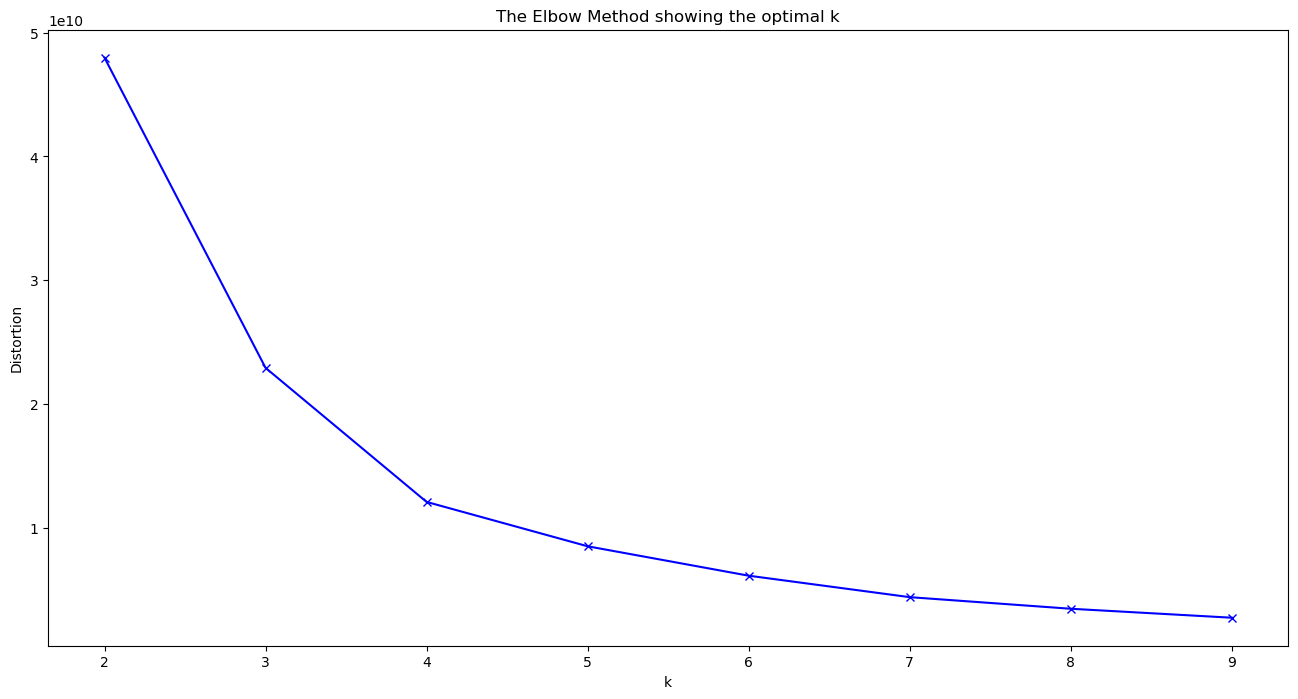

In [29]:
distortions=[]
K=range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster1)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster1)
centroids1=kmeans.cluster_centers_
print(centroids1)

[[3.04065731e+01 6.21056672e+03]
 [3.48018405e+01 4.06923629e+04]
 [2.92373511e+01 1.82172280e+04]]


In [31]:
print(kmeans.labels_)

[2 0 0 ... 0 0 2]


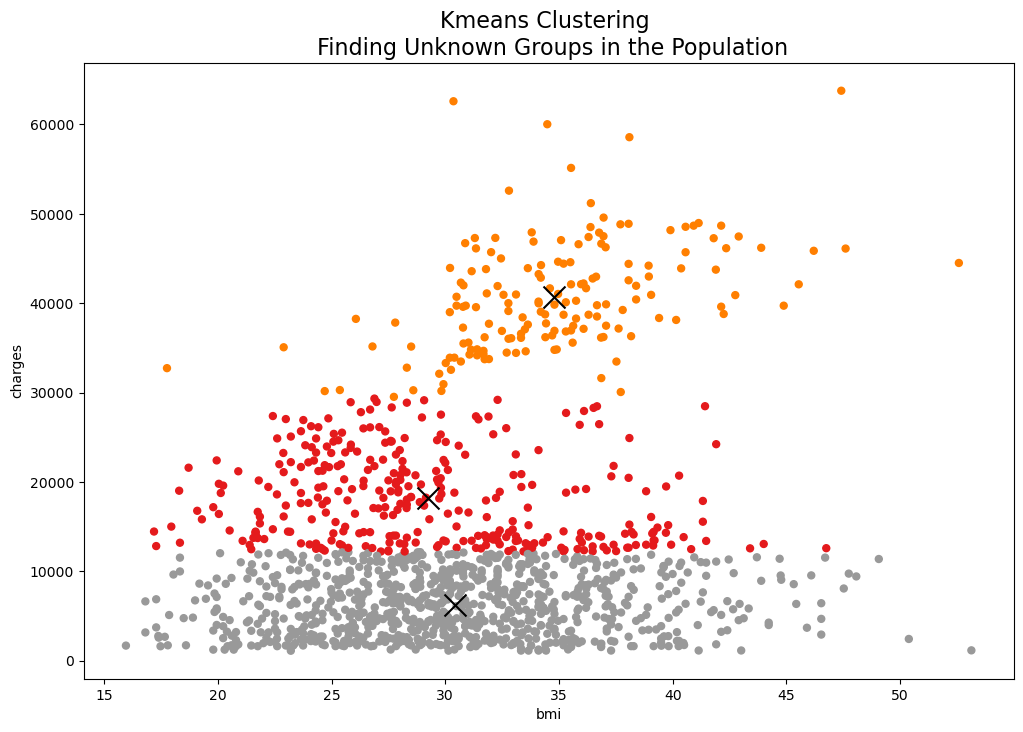

In [32]:
fig = plt.figure(figsize=(12,8))
plt.scatter(cluster1.values[:,0], cluster1.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(centroids1[:,0] ,centroids1[:,1], color='black', marker="x", s=250)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

In [33]:
print("Silhouette_score: ", metrics.silhouette_score(cluster1, kmeans.labels_))

Silhouette_score:  0.6038242401866833


In [34]:
agglo= AgglomerativeClustering(n_clusters = 3).fit(cluster1)
print("AgglomerativeClustering Silhouette_score: ", metrics.silhouette_score(cluster1, agglo.labels_))

from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(cluster1)

MS= MeanShift(bandwidth=estimate_bandwidth(cluster1)).fit(cluster1)
print("MeanShift Silhouette_score: ", metrics.silhouette_score(cluster1, MS.labels_))

bir= Birch(n_clusters = 3).fit(cluster1)
print("Birch Silhouette_score: ", metrics.silhouette_score(cluster1, bir.labels_))

AgglomerativeClustering Silhouette_score:  0.6477479834054057
MeanShift Silhouette_score:  0.6971560578697419
Birch Silhouette_score:  0.6477479834054057


# Clustering age-charges

In [44]:
cluster2=df[['age','charges']]
cluster2

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
...,...,...
1333,50,10600.54830
1334,18,2205.98080
1335,18,1629.83350
1336,21,2007.94500


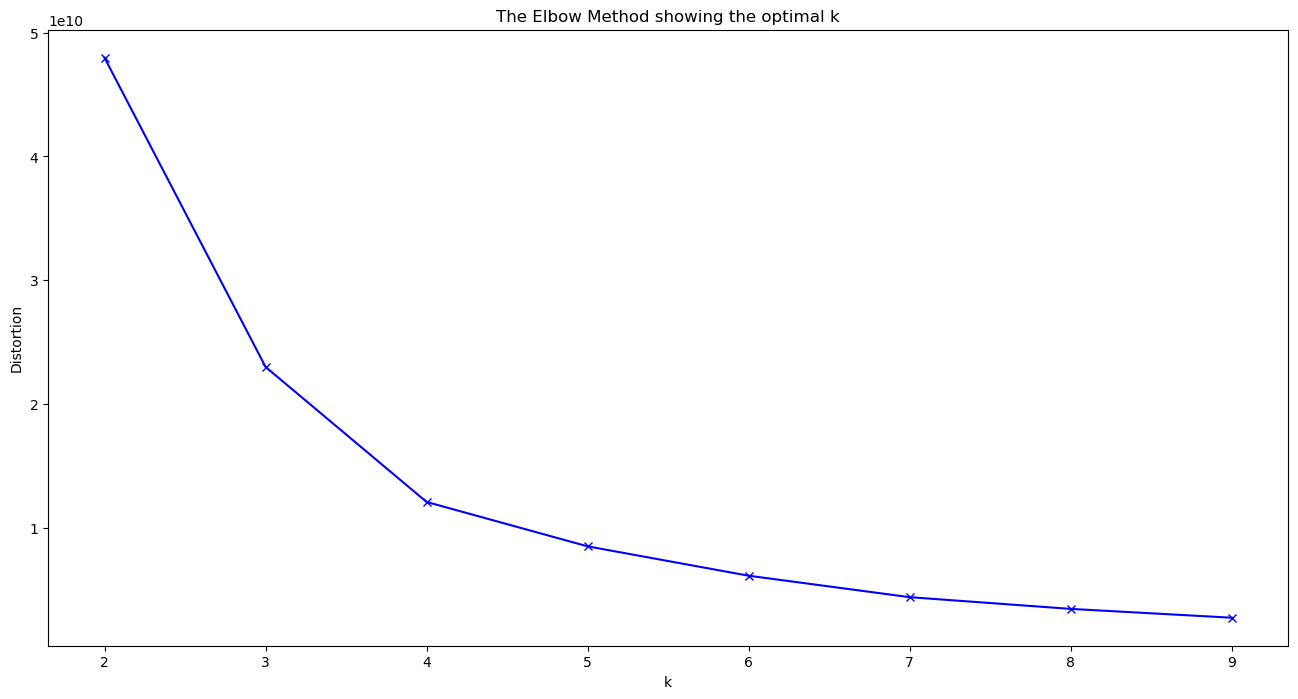

In [34]:
distortions=[]
K=range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster2)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=3).fit(cluster2)
centroids2=kmeans.cluster_centers_
print(centroids2)

[[4.54485050e+01 1.86261845e+04]
 [3.68638444e+01 6.34367494e+03]
 [4.03765432e+01 4.07613086e+04]]


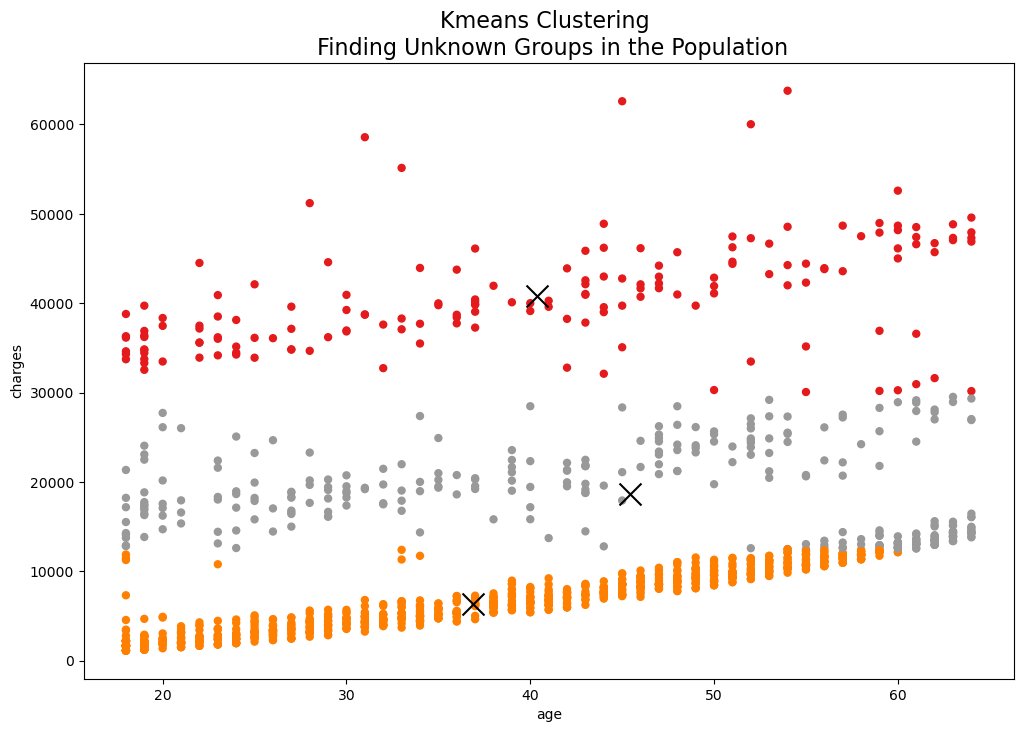


 Silhouette score:  0.6079243280820887


In [36]:
fig = plt.figure(figsize=(12,8))
plt.scatter(cluster2.values[:,0], cluster2.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(centroids2[:,0] ,centroids2[:,1], color='black', marker="x", s=250)
plt.xlabel('age')
plt.ylabel('charges')
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()
print("\n Silhouette score: ",metrics.silhouette_score(cluster2, kmeans.labels_))

In [37]:
kmeans.cluster_centers_

array([[4.54485050e+01, 1.86261845e+04],
       [3.68638444e+01, 6.34367494e+03],
       [4.03765432e+01, 4.07613086e+04]])

In [38]:
agglo= AgglomerativeClustering(n_clusters = 3).fit(cluster2)
print("AgglomerativeClustering Silhouette_score: ", metrics.silhouette_score(cluster2, agglo.labels_))

from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(cluster2)

MS= MeanShift(bandwidth=estimate_bandwidth(cluster2)).fit(cluster2)
print("MeanShift Silhouette_score: ", metrics.silhouette_score(cluster2, MS.labels_))

bir= Birch(n_clusters = 3).fit(cluster2)
print("Birch Silhouette_score: ", metrics.silhouette_score(cluster2, bir.labels_))

AgglomerativeClustering Silhouette_score:  0.6385679291104686
MeanShift Silhouette_score:  0.6971551199725785
Birch Silhouette_score:  0.6477463489210299


# Clustering using the whole data

In [39]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [40]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
centroids=kmeans.cluster_centers_
print(centroids)

[[3.55502451e+01 5.04901961e-01 3.04862623e+01 1.10539216e+00
  6.66133815e-16 5.93908450e+03 2.26715686e-01 2.48774510e-01
  2.61029412e-01 2.63480392e-01]
 [4.12189349e+01 6.15384615e-01 3.45685503e+01 1.13609467e+00
  9.28994083e-01 4.02796228e+04 2.18934911e-01 2.01183432e-01
  3.60946746e-01 2.18934911e-01]
 [4.67755682e+01 4.51704545e-01 2.91993182e+01 1.05397727e+00
  3.32386364e-01 1.73313529e+04 2.89772727e-01 2.47159091e-01
  2.55681818e-01 2.07386364e-01]]


In [41]:
print(kmeans.labels_)

[2 0 0 ... 0 0 1]


In [42]:
print("\n Silhouette score: ",metrics.silhouette_score(df, kmeans.labels_))


 Silhouette score:  0.5958331984593627


# Other clustering algorithms using the whole data

In [43]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [44]:
agglo= AgglomerativeClustering(n_clusters = 3).fit(df)
print("Silhouette_score: ", metrics.silhouette_score(df, agglo.labels_))

Silhouette_score:  0.6477438861439544


In [45]:
db= DBSCAN(eps=0.5, min_samples=3).fit(df)
print("Silhouette_score: ", metrics.silhouette_score(df, db.labels_))

Silhouette_score:  -0.40108001156959716


In [46]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(df)

7076.93340551976

In [47]:
MS= MeanShift(bandwidth=estimate_bandwidth(df)).fit(df)
print("Silhouette_score: ", metrics.silhouette_score(df, MS.labels_))

Silhouette_score:  0.6971539848038453


In [48]:
bir= Birch(n_clusters = 3).fit(df)
print("Silhouette_score: ", metrics.silhouette_score(df, bir.labels_))

Silhouette_score:  0.6477438861439544


In [79]:
spec= SpectralClustering(n_clusters=3,affinity='nearest_neighbors').fit(df)
print("Silhouette_score: ", metrics.silhouette_score(df, spec.labels_))

Silhouette_score:  0.5306236490332323


In [50]:
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled

,0,1,2,3,4,5,6,7,8,9
0,0.021739,0.0,0.321227,0.0,1.0,0.251611,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.479150,0.2,0.0,0.009636,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.458434,0.6,0.0,0.053115,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.181464,0.0,0.0,0.333010,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.347592,0.0,0.0,0.043816,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1332,0.695652,1.0,0.403820,0.6,0.0,0.151299,0.0,1.0,0.0,0.0
1333,0.000000,0.0,0.429379,0.0,0.0,0.017305,1.0,0.0,0.0,0.0
1334,0.000000,0.0,0.562012,0.0,0.0,0.008108,0.0,0.0,1.0,0.0
1335,0.065217,0.0,0.264730,0.0,0.0,0.014144,0.0,0.0,0.0,1.0


In [51]:
AP= AffinityPropagation(max_iter=10000).fit(df_scaled)
print("Silhouette_score: ", metrics.silhouette_score(df_scaled, AP.labels_))

Silhouette_score:  0.3613362413032027


# Hyperparameter tuning

In [52]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [53]:
from sklearn.model_selection import ParameterGrid
parameters = {'n_clusters': [2, 3, 4, 5, 10, 20,30]}

parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [54]:
best_score = -1

In [55]:
for g in parameter_grid:
    model = KMeans(**g)
    model.fit(df)

    ss = metrics.silhouette_score(df, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.7335341778325333
Parameter:  {'n_clusters': 3} Score:  0.6186945378391566
Parameter:  {'n_clusters': 4} Score:  0.610427384175698
Parameter:  {'n_clusters': 5} Score:  0.598189189476185
Parameter:  {'n_clusters': 10} Score:  0.55902624144565
Parameter:  {'n_clusters': 20} Score:  0.5536227228772125
Parameter:  {'n_clusters': 30} Score:  0.5488786308851993


In [56]:
best_grid

{'n_clusters': 2}

In [57]:
model.set_params(**best_grid)
model.fit(df)

KMeans(n_clusters=2)

In [58]:
set(model.labels_)

{0, 1}

In [59]:
n_noise = list(model.labels_).count(-1)

n_noise

0

In [60]:
parameters = {'eps': [5,10,20,30],
              'min_samples': [0.7,1,2,5]
              }

parameter_grid = ParameterGrid(parameters)

list(parameter_grid)

[{'eps': 5, 'min_samples': 0.7},
 {'eps': 5, 'min_samples': 1},
 {'eps': 5, 'min_samples': 2},
 {'eps': 5, 'min_samples': 5},
 {'eps': 10, 'min_samples': 0.7},
 {'eps': 10, 'min_samples': 1},
 {'eps': 10, 'min_samples': 2},
 {'eps': 10, 'min_samples': 5},
 {'eps': 20, 'min_samples': 0.7},
 {'eps': 20, 'min_samples': 1},
 {'eps': 20, 'min_samples': 2},
 {'eps': 20, 'min_samples': 5},
 {'eps': 30, 'min_samples': 0.7},
 {'eps': 30, 'min_samples': 1},
 {'eps': 30, 'min_samples': 2},
 {'eps': 30, 'min_samples': 5}]

In [61]:
model = DBSCAN()
best_score = -1

In [62]:
for g in parameter_grid:
    model.set_params(**g) 
    model.fit(df)

    ss = metrics.silhouette_score(df, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'eps': 5, 'min_samples': 0.7} Score:  0.1757341335824223
Parameter:  {'eps': 5, 'min_samples': 1} Score:  0.1757341335824223
Parameter:  {'eps': 5, 'min_samples': 2} Score:  -0.4894509794564775
Parameter:  {'eps': 5, 'min_samples': 5} Score:  -0.20721430493411916
Parameter:  {'eps': 10, 'min_samples': 0.7} Score:  0.26983335893178156
Parameter:  {'eps': 10, 'min_samples': 1} Score:  0.26983335893178156
Parameter:  {'eps': 10, 'min_samples': 2} Score:  -0.1620193287546799
Parameter:  {'eps': 10, 'min_samples': 5} Score:  -0.5381667384943266
Parameter:  {'eps': 20, 'min_samples': 0.7} Score:  0.45091470781981746
Parameter:  {'eps': 20, 'min_samples': 1} Score:  0.45091470781981746
Parameter:  {'eps': 20, 'min_samples': 2} Score:  0.24661420874084694
Parameter:  {'eps': 20, 'min_samples': 5} Score:  -0.12641858276346368
Parameter:  {'eps': 30, 'min_samples': 0.7} Score:  0.48083546372257063
Parameter:  {'eps': 30, 'min_samples': 1} Score:  0.48083546372257063
Parameter:  {'ep

In [63]:
best_grid

{'eps': 30, 'min_samples': 0.7}

# Classification to predict cluster

In [64]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
centroids=kmeans.cluster_centers_
set(kmeans.labels_)

{0, 1}

In [65]:
classdf=df.drop('charges',axis=1)
classdf['category'] = kmeans.labels_
classdf

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,category
0,19,0,27.900,0,1,0,0,0,1,0
1,18,1,33.770,1,0,0,0,1,0,0
2,28,1,33.000,3,0,0,0,1,0,0
3,33,1,22.705,0,0,0,1,0,0,0
4,32,1,28.880,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0,0
1334,18,0,31.920,0,0,1,0,0,0,0
1335,18,0,36.850,0,0,0,0,1,0,0
1336,21,0,25.800,0,0,0,0,0,1,0


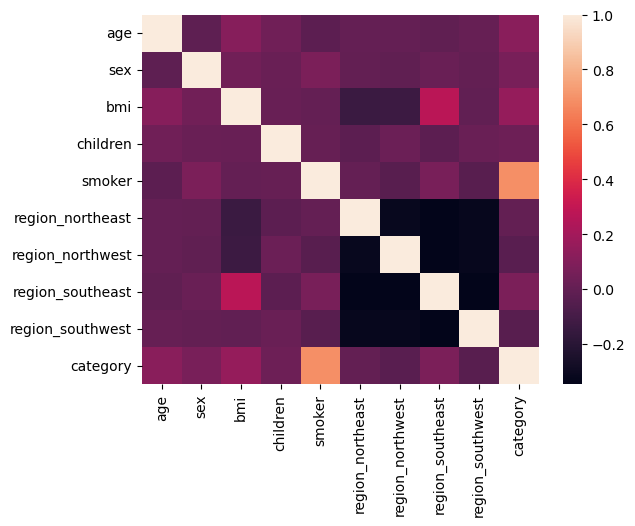

In [66]:
sns.heatmap(classdf.corr())
plt.show()

In [67]:
classdf.groupby('category').mean()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
category,,,,,,,,,
0,38.45082,0.489982,30.217099,1.080146,0.075592,0.243169,0.249545,0.25592,0.251366
1,42.76569,0.573222,32.714059,1.167364,0.799163,0.238494,0.209205,0.34728,0.205021


In [68]:
classdf['category'].value_counts()

0    1098
1     239
Name: category, dtype: int64

In [69]:
x = classdf.drop(["category"], axis = 1)
y = classdf["category"]
x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size = 0.2)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

logisticmodel = make_pipeline(StandardScaler(with_mean=False),LogisticRegression(max_iter=10000))
logisticmodel.fit(x_train, y_train)
y_train_pred=logisticmodel.predict(x_train)
y_test_pred = logisticmodel.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred,average='macro')
train_precision = precision_score(y_train, y_train_pred,average='macro')
test_accuracy = accuracy_score(y_test, y_test_pred)     
test_recall = recall_score(y_test, y_test_pred,average='macro')
test_precision = precision_score(y_test, y_test_pred, average='macro')


print('\nTrain accuracy:', train_accuracy)
print('Train recall:', train_recall)
print('Train precision:', train_precision)
print('\nTest accuracy:', test_accuracy)
print('Test recall:', test_recall)
print('Test precision:',test_precision)


Train accuracy: 0.9232927970065482
Train recall: 0.8620345045234589
Train precision: 0.8771782413327001

Test accuracy: 0.9589552238805971
Test recall: 0.9097157622739018
Test precision: 0.9346491228070175


# Regression to predict charges within a cluster

In [71]:
regdf=df.copy()
regdf['category'] = kmeans.labels_
regdf

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,category
0,19,0,27.900,0,1,16884.92400,0,0,0,1,0
1,18,1,33.770,1,0,1725.55230,0,0,1,0,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1,0


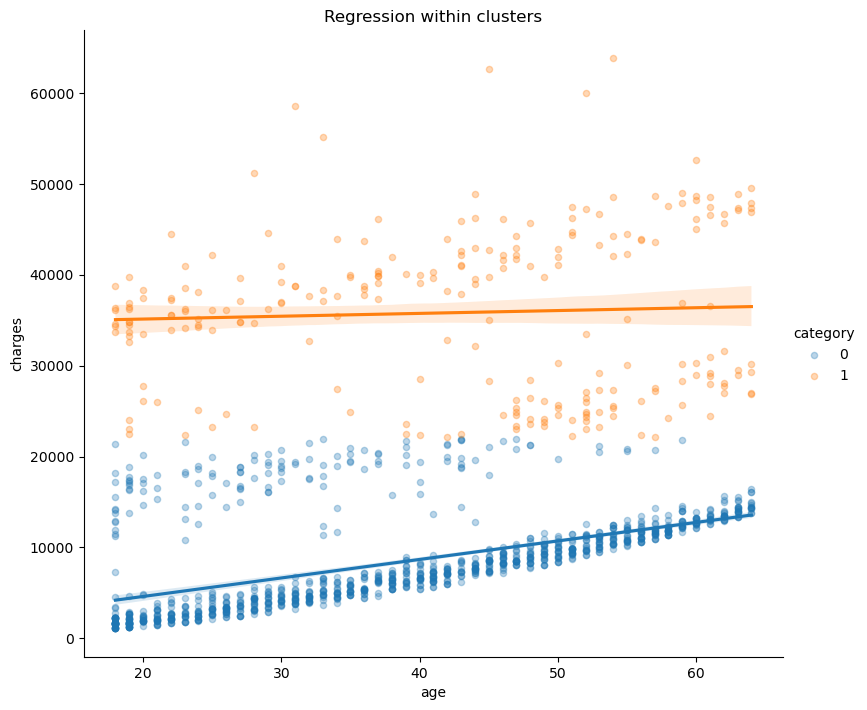

In [72]:
sns.lmplot(data=regdf, x='age', y='charges', hue='category', scatter_kws={"alpha": .3, 's': 20}, height=7, aspect=1.15)
plt.title('Regression within clusters')
plt.show()

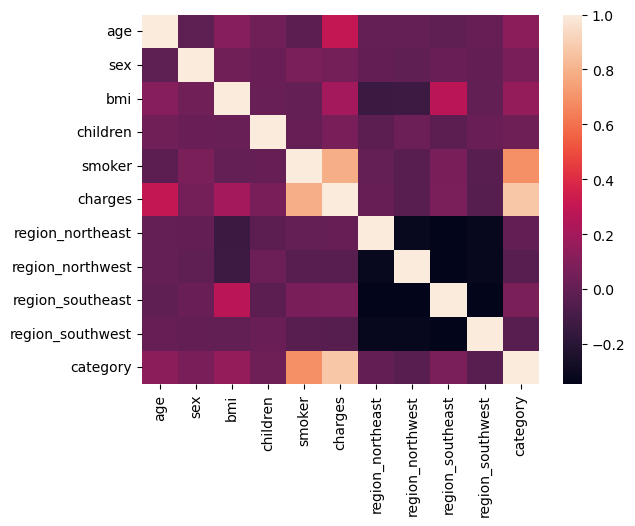

In [73]:
sns.heatmap(regdf.corr())
plt.show()

Category and charges are highly correlated

In [74]:
x=regdf.drop('charges',axis=1)
y=regdf['charges']
x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size = 0.2)
linearmodel = make_pipeline(StandardScaler(with_mean=False),LinearRegression())
linearmodel.fit(x_train, y_train)
y_pred = linearmodel.predict(x_test)
print("\nTraining score: ",linearmodel.score(x_train,y_train),"\nTest Score: ",r2_score(y_test,y_pred))


Training score:  0.8859301161926694 
Test Score:  0.9043763949819442
